# Activity 3 - Housing Price Prediction using Linear Regression with One Variable

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, LinearRegression 

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

df = pd.read_csv('housing_price.csv')
df.head().T

,0,1,2,3,4
Size (sq ft),650,700,850,900,1000
Price ($1000),150,160,170,175,180


### Data Preparation

In [6]:
# rename columns for easier access
df.columns = ['size_sq_ft', 'price']

Text(0.5, 1.0, 'Size in Sq ft on Price($1000)')

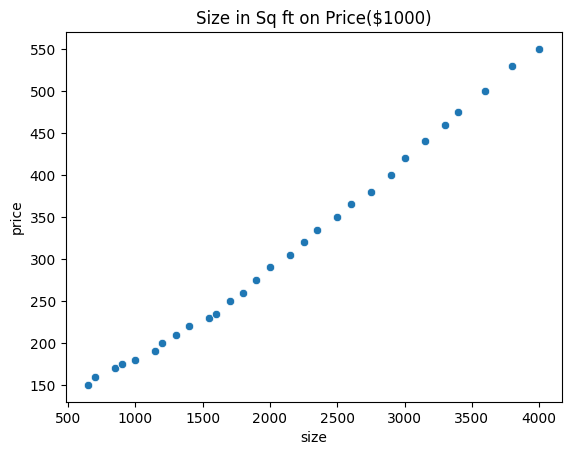

In [7]:
sns.scatterplot(df, x='size_sq_ft', y='price')
plt.xlabel("size")
plt.ylabel("price")
plt.title("Size in Sq ft on Price($1000)")

In [8]:
# # get target variable and delete it from the dataframe
y = df.price.values
# # del df['price']
feature = ['size_sq_ft']

# 70 30 split
df_train, df_val, y_train, y_val = train_test_split(df, y, test_size=0.3, random_state=1)

In [9]:
X_train = df_train[feature].values
X_val = df_val[feature].values

### Model Selection

#### Ridge

In [10]:
ridge_lr = Ridge(random_state=42)
ridge_lr.fit(X_train, y_train)
y_preds = ridge_lr.predict(X_val)
print(f"Ridge MSE: {mean_squared_error(y_val, y_preds)}")

Ridge MSE: 77.62260689645035


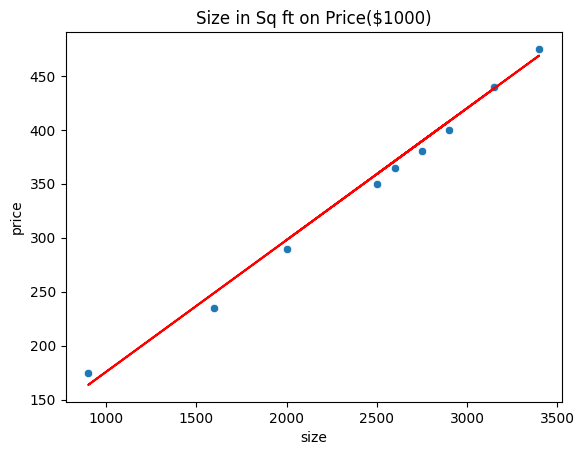

In [11]:
sns.scatterplot(df_val, x='size_sq_ft', y='price')
plt.plot(X_val, y_preds, color='red')
plt.xlabel("size")
plt.ylabel("price")
plt.title("Size in Sq ft on Price($1000)");

In [12]:
ridge_lr.coef_

array([0.12209888])

#### Lasso

In [13]:
lasso_lr = Lasso(random_state=42)
lasso_lr.fit(X_train, y_train)
y_preds = lasso_lr.predict(X_val)
print(f"Lasso MSE: {mean_squared_error(y_val, y_preds)}")

Lasso MSE: 77.61858291695205


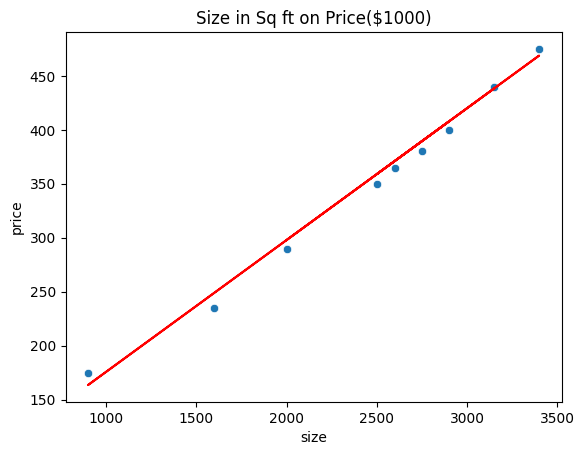

In [14]:
sns.scatterplot(df_val, x='size_sq_ft', y='price')
plt.plot(X_val, y_preds, color='red')
plt.xlabel("size")
plt.ylabel("price")
plt.title("Size in Sq ft on Price($1000)");

In [15]:
lasso_lr.coef_

array([0.12209794])

#### Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_val)
print(f"Linear Regression MSE: {mean_squared_error(y_val, y_preds)}")

Linear Regression MSE: 77.62263161765078


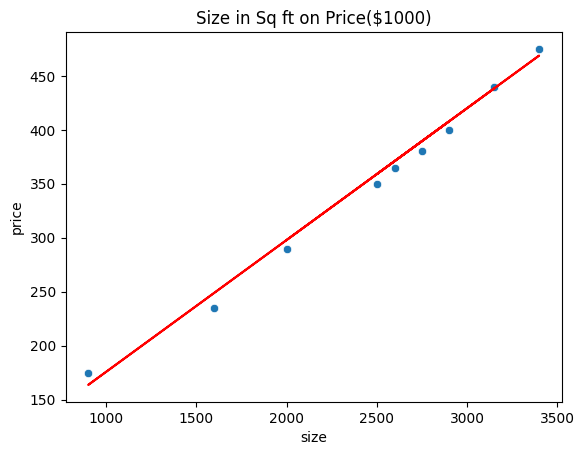

In [17]:
sns.scatterplot(df_val, x='size_sq_ft', y='price')
plt.plot(X_val, y_preds, color='red')
plt.xlabel("size")
plt.ylabel("price")
plt.title("Size in Sq ft on Price($1000)");

In [18]:
lr.coef_

array([0.12209889])

In [19]:
models = [lr, ridge_lr, lasso_lr]
names = ['linear_regression', 'ridge', 'lasso']
scores = []

for i, model in enumerate(models):
    # predict to get mse
    mse = mean_squared_error(y_val, model.predict(X_val))
    # assign to scores dictionary the results
    scores.append((names[i], model.coef_[0], mse))

df_results = pd.DataFrame(scores, columns=['model', 'feature_weight', 'mse'])

In [20]:
df_results.set_index('model').sort_values(by='mse')

,feature_weight,mse
model,,
lasso,0.122098,77.618583
ridge,0.122099,77.622607
linear_regression,0.122099,77.622632


### Final Model

In [28]:
alphas = np.linspace(1.0, 10, 15)
scores = []

for alpha in alphas:
    lasso_lr = Lasso(alpha=alpha, random_state=42)
    lasso_lr.fit(X_train, y_train)
    y_preds = lasso_lr.predict(X_val)
    mse = mean_squared_error(y_val, y_preds)
    scores.append((alpha, mse))

pd.DataFrame(scores, columns=['alpha', 'mse']).set_index('alpha').sort_values(by='mse')

,mse
alpha,
10.000000,77.582206
9.357143,77.584800
8.714286,77.587396
8.071429,77.589991
7.428571,77.592588
6.785714,77.595185
6.142857,77.597782
5.500000,77.600381
4.857143,77.602979


MSE keeps getting better as I increase the regularization. It can mean the model is overfitting which is completely natural on smaller datasets.

In [29]:
lasso_lr = Lasso(alpha=alpha, random_state=42)
lasso_lr.fit(X_train, y_train)
y_preds = lasso_lr.predict(X_val)
mse = mean_squared_error(y_val, y_preds)
print(f"Lasso MSE: {mse}")

Lasso MSE: 77.58220555022217


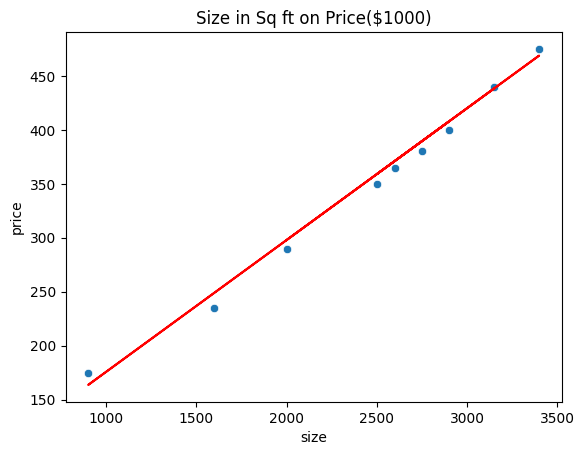

In [30]:
sns.scatterplot(df_val, x='size_sq_ft', y='price')
plt.plot(X_val, y_preds, color='red')
plt.xlabel("size")
plt.ylabel("price")
plt.title("Size in Sq ft on Price($1000)");